# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import os

In [2]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Data Summary

In [4]:
cwd = os.getcwd()
print("Current working directory:", cwd)

Current working directory: C:\Users\trina\Akhil_Assignment


## Data Loading

In [5]:
df = pd.read_csv("./Base.csv",low_memory=False)

## Data Summary

In [6]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [7]:
df.shape

(1000000, 32)

In [8]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

## Data Dictionary

## Data Types

In [9]:
dtypes = df.dtypes

# count number of int, float, and object columns
int_count = (dtypes == "int64").sum()
float_count = (dtypes == "float64").sum()
object_count = (dtypes == "object").sum()

# print counts of each data type
print("Int columns:", int_count)
print("Float columns:", float_count)
print("Object columns:", object_count)

Int columns: 18
Float columns: 9
Object columns: 5


In [10]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Int columns:", int_columns)
print("\n")
print("Float columns:", float_columns)
print("\n")
print("Object columns:", object_columns)

Int columns: ['fraud_bool', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'zip_count_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


Float columns: ['income', 'name_email_similarity', 'days_since_request', 'intended_balcon_amount', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'proposed_credit_limit', 'session_length_in_minutes']


Object columns: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


# Missing Values

In [11]:
columns_to_replace = ['prev_address_months_count', 'current_address_months_count', 'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']

df[columns_to_replace] = df[columns_to_replace].replace(-1, np.nan)


In [12]:
df["prev_address_months_count"].value_counts(dropna=False)

NaN      712920
11.0      11475
28.0      10275
29.0      10150
10.0      10082
          ...  
372.0         1
374.0         1
5.0           1
375.0         1
381.0         1
Name: prev_address_months_count, Length: 374, dtype: int64

In [13]:
df.loc[df['intended_balcon_amount'] < 0, 'intended_balcon_amount'] = np.nan

In [14]:
# Top ten columns with missing values %
missing = df.count()/len(df)
missing = (1-missing)*100
missing.sort_values(ascending=False).head(10)

intended_balcon_amount          74.2523
prev_address_months_count       71.2920
bank_months_count               25.3635
current_address_months_count     0.4254
session_length_in_minutes        0.2015
device_distinct_emails_8w        0.0359
month                            0.0000
velocity_24h                     0.0000
velocity_6h                      0.0000
zip_count_4w                     0.0000
dtype: float64

Based on the missing value information, the following columns have missing values:

intended_balcon_amount
prev_address_months_count,
bank_months_count,
current_address_months_count,
session_length_in_minutes,
device_distinct_emails_8w.

Among these columns, intended_balcon_amount and prev_address_months_count has more than 71% missing values. Therefore, it is recommended to remove these columns from the dataset.

To address missing values in the remaining columns, we can consider various strategies such as:

Removing rows with missing values: If the number of missing values in the other columns is relatively small, we may choose to remove the rows containing missing values.

Imputation: If the missing values are a small portion of the dataset, We can fill them with appropriate values. This can include methods like mean, median, mode imputation, or using machine learning algorithms to predict missing values based on other variables.

It is important to assess the impact of missing values on the analysis or model being developed and select the most suitable approach for handling them.


In [15]:
df = df.drop(['intended_balcon_amount','prev_address_months_count'], axis = 1)

## Missing Values Treatment

In [16]:
df['bank_months_count']=df['bank_months_count'].fillna(df['bank_months_count'].median())
df['current_address_months_count']=df['current_address_months_count'].fillna(df['current_address_months_count'].median())
df['session_length_in_minutes']=df['session_length_in_minutes'].fillna(df['session_length_in_minutes'].median())
df['credit_risk_score']=df['credit_risk_score'].fillna(df['credit_risk_score'].median())
df['device_distinct_emails_8w']=df['device_distinct_emails_8w'].fillna(df['device_distinct_emails_8w'].median())

## Data after Missing Values Treatment

In [17]:
# Top ten columns with missing values %
missing = df.count()/len(df)
missing = (1-missing)*100
missing.sort_values(ascending=False).head(10)

month                           0.0
device_fraud_count              0.0
income                          0.0
name_email_similarity           0.0
current_address_months_count    0.0
customer_age                    0.0
days_since_request              0.0
payment_type                    0.0
zip_count_4w                    0.0
velocity_6h                     0.0
dtype: float64

In [18]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Int columns:", int_columns)
print("\n")
print("Float columns:", float_columns)
print("\n")
print("Object columns:", object_columns)

Int columns: ['fraud_bool', 'customer_age', 'zip_count_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_fraud_count', 'month']


Float columns: ['income', 'name_email_similarity', 'current_address_months_count', 'days_since_request', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w']


Object columns: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


# Univariate Analysis

## Numerical Data Analysis : Int

In [19]:
print("Int columns:", int_columns)

Int columns: ['fraud_bool', 'customer_age', 'zip_count_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'device_fraud_count', 'month']


### Target variable

In [20]:
df['fraud_bool'].value_counts(dropna=False)

0    988971
1     11029
Name: fraud_bool, dtype: int64

In [21]:
df["fraud_bool"].value_counts(1, dropna=False)*100

0    98.8971
1     1.1029
Name: fraud_bool, dtype: float64

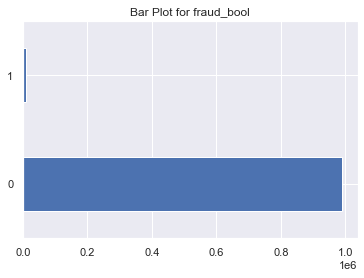

In [22]:
df["fraud_bool"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for fraud_bool")
plt.show()

Based on the provided information, the fraud_bool variable exhibits an imbalanced distribution. The percentage of instances labeled as 0 (non-fraudulent) is 98.8971%, while the percentage of instances labeled as 1 (fraudulent) is 1.1029%.

Imbalanced problems like this can pose challenges during analysis and modeling, as the minority class (fraudulent) may be underrepresented, making it harder for a model to learn and predict accurately.

### customer_age

In [23]:
df["customer_age"].value_counts(dropna=False)

30    311433
20    245855
40    238712
50    140353
60     34770
10     20987
70      6517
80      1297
90        76
Name: customer_age, dtype: int64

In [24]:
df["customer_age"].value_counts(1, dropna=False)*100 

30    31.1433
20    24.5855
40    23.8712
50    14.0353
60     3.4770
10     2.0987
70     0.6517
80     0.1297
90     0.0076
Name: customer_age, dtype: float64

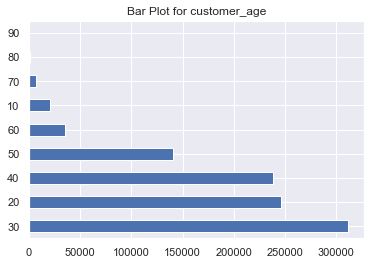

In [25]:
df["customer_age"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for customer_age")
plt.show()

The provided information describes the age distribution of applicants, indicating the following:

More than 93% of the applicants fall within the age range of 20-50.
Less than 1% of the applicants are aged 60 or above.
Approximately 2% of the applicants are aged 10.

These statistics highlight the age composition of the applicant pool, emphasizing that a significant majority (over 93%) are between the ages of 20 and 50. Meanwhile, a very small proportion (less than 1%) consists of individuals aged 60 or older. Additionally, around 2% of the applicants are found to be 10 years old.

### zip_count_4w

In [26]:
df["zip_count_4w"].value_counts(dropna=False)

1020    798
1062    782
1042    770
969     767
1026    763
       ... 
5752      1
5906      1
6158      1
6528      1
6392      1
Name: zip_count_4w, Length: 6306, dtype: int64

In [27]:
df["zip_count_4w"].value_counts(1, dropna=False)*100 

1020    0.0798
1062    0.0782
1042    0.0770
969     0.0767
1026    0.0763
         ...  
5752    0.0001
5906    0.0001
6158    0.0001
6528    0.0001
6392    0.0001
Name: zip_count_4w, Length: 6306, dtype: float64

### bank_branch_count_8w

In [28]:
df["bank_branch_count_8w"].value_counts(dropna=False)

1       149028
0       144376
2        57792
11       31160
10       30694
         ...  
2337         1
2276         1
2339         1
2308         1
2381         1
Name: bank_branch_count_8w, Length: 2326, dtype: int64

In [29]:
df["bank_branch_count_8w"].value_counts(1, dropna=False)*100 

1       14.9028
0       14.4376
2        5.7792
11       3.1160
10       3.0694
         ...   
2337     0.0001
2276     0.0001
2339     0.0001
2308     0.0001
2381     0.0001
Name: bank_branch_count_8w, Length: 2326, dtype: float64

The variable "bank_branch_count_8w" in a dataset typically represents the count or number of different bank branches that an individual has interacted with or visited within the past 8 weeks.

### date_of_birth_distinct_emails_4w

The variable "date_of_birth_distinct_emails_4w" in a dataset typically represents the count or number of distinct or unique email addresses associated with individuals who share the same date of birth within a 4-week period.

In [30]:
df["date_of_birth_distinct_emails_4w"].value_counts(dropna=False)

7     83193
5     80799
8     79491
6     78225
11    73456
9     67341
10    62681
4     62549
13    60773
12    52409
3     44227
15    43200
14    39927
2     35717
16    25628
18    21081
17    20017
19    16453
1     14377
20    10237
21     6762
22     5599
23     4788
24     3476
25     2155
0      1336
26     1212
27      706
28      527
29      455
30      383
31      273
32      223
33      142
34       85
35       49
36       31
37       12
38        3
39        2
Name: date_of_birth_distinct_emails_4w, dtype: int64

In [31]:
df["date_of_birth_distinct_emails_4w"].value_counts(1, dropna=False)*100 

7     8.3193
5     8.0799
8     7.9491
6     7.8225
11    7.3456
9     6.7341
10    6.2681
4     6.2549
13    6.0773
12    5.2409
3     4.4227
15    4.3200
14    3.9927
2     3.5717
16    2.5628
18    2.1081
17    2.0017
19    1.6453
1     1.4377
20    1.0237
21    0.6762
22    0.5599
23    0.4788
24    0.3476
25    0.2155
0     0.1336
26    0.1212
27    0.0706
28    0.0527
29    0.0455
30    0.0383
31    0.0273
32    0.0223
33    0.0142
34    0.0085
35    0.0049
36    0.0031
37    0.0012
38    0.0003
39    0.0002
Name: date_of_birth_distinct_emails_4w, dtype: float64

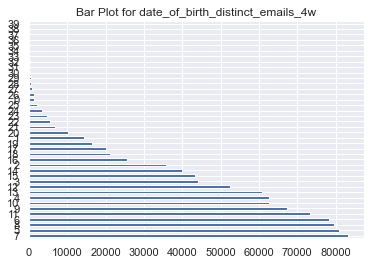

In [32]:
df["date_of_birth_distinct_emails_4w"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for date_of_birth_distinct_emails_4w")
plt.show()

### credit_risk_score

In [33]:
df["credit_risk_score"].value_counts(dropna=False)

 113    6791
 116    6784
 110    6774
 115    6734
 117    6717
        ... 
-167       1
-168       1
-169       1
-170       1
 386       1
Name: credit_risk_score, Length: 551, dtype: int64

In [34]:
df["credit_risk_score"].value_counts(1, dropna=False)*100 

 113    0.6791
 116    0.6784
 110    0.6774
 115    0.6734
 117    0.6717
         ...  
-167    0.0001
-168    0.0001
-169    0.0001
-170    0.0001
 386    0.0001
Name: credit_risk_score, Length: 551, dtype: float64

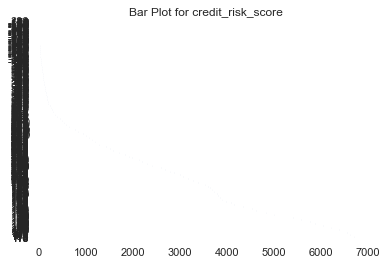

In [35]:
df["credit_risk_score"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for credit_risk_score")
plt.show()

### email_is_free

The variable "email_is_free" in a dataset typically represents whether an email address is associated with a free email service provider or not.

In many cases, individuals can choose between free email services (such as Gmail, Yahoo Mail, or Outlook.com) or paid email services offered by their employers or specific providers. The "email_is_free" variable is often a binary indicator that denotes whether an email address belongs to a free email service provider (1) or not (0).

In [36]:
df["email_is_free"].value_counts(dropna=False)

1    529886
0    470114
Name: email_is_free, dtype: int64

In [37]:
df["email_is_free"].value_counts(1, dropna=False)*100 

1    52.9886
0    47.0114
Name: email_is_free, dtype: float64

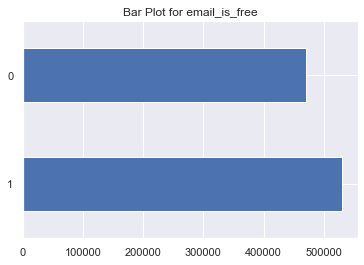

In [38]:
df["email_is_free"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for email_is_free")
plt.show()

### phone_home_valid

The variable "phone_home_valid" in a dataset typically represents whether a home phone number is considered valid or not.

In [39]:
df["phone_home_valid"].value_counts(dropna=False)

0    582923
1    417077
Name: phone_home_valid, dtype: int64

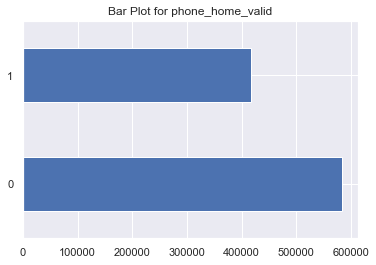

In [40]:
df["phone_home_valid"].value_counts(1, dropna=False)*100 

df["phone_home_valid"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for phone_home_valid")
plt.show()

### has_other_cards   

In [41]:
df["has_other_cards"].value_counts(dropna=False)

0    777012
1    222988
Name: has_other_cards, dtype: int64

In [42]:
df["has_other_cards"].value_counts(1, dropna=False)*100 

0    77.7012
1    22.2988
Name: has_other_cards, dtype: float64

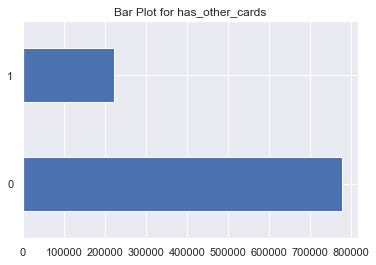

In [43]:
df["has_other_cards"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for has_other_cards")
plt.show()

The variable "has_other_cards" in a dataset typically represents whether an individual has other credit cards or not.

### foreign_request

In [44]:
df["foreign_request"].value_counts(dropna=False)

0    974758
1     25242
Name: foreign_request, dtype: int64

In [45]:
df["foreign_request"].value_counts(1, dropna=False)*100 

0    97.4758
1     2.5242
Name: foreign_request, dtype: float64

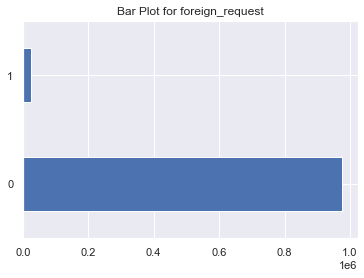

In [46]:
df["foreign_request"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for foreign_request")
plt.show()

### keep_alive_session

In [47]:
df["keep_alive_session"].value_counts(dropna=False)

1    576947
0    423053
Name: keep_alive_session, dtype: int64

In [48]:
df["keep_alive_session"].value_counts(1, dropna=False)*100 

1    57.6947
0    42.3053
Name: keep_alive_session, dtype: float64

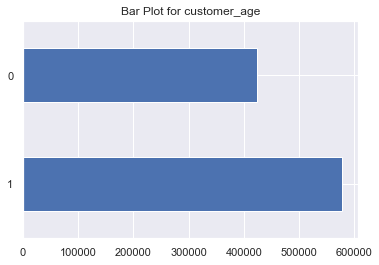

In [49]:
df["keep_alive_session"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for customer_age")
plt.show()

### device_fraud_count

In [50]:
df["device_fraud_count"].value_counts(dropna=False)

0    1000000
Name: device_fraud_count, dtype: int64

In [51]:
df["device_fraud_count"].value_counts(1, dropna=False)*100 

0    100.0
Name: device_fraud_count, dtype: float64

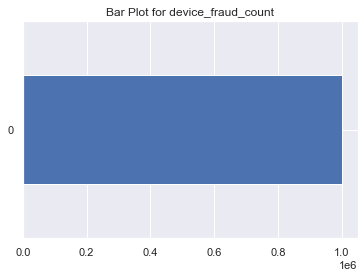

In [52]:
df["device_fraud_count"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for device_fraud_count")
plt.show()

Since the "device_fraud_count" feature does not exhibit any variance in the data, meaning it contains only a single value or does not provide any distinguishing information, it would not contribute to the prediction or analysis tasks. Therefore, it is recommended to remove this feature from the dataset.

In [53]:
df = df.drop(['device_fraud_count'], axis = 1)

### month

In [54]:
df["month"].value_counts(dropna=False)

3    150936
2    136979
0    132440
4    127691
1    127620
5    119323
6    108168
7     96843
Name: month, dtype: int64

In [55]:
df["month"].value_counts(1, dropna=False)*100 

3    15.0936
2    13.6979
0    13.2440
4    12.7691
1    12.7620
5    11.9323
6    10.8168
7     9.6843
Name: month, dtype: float64

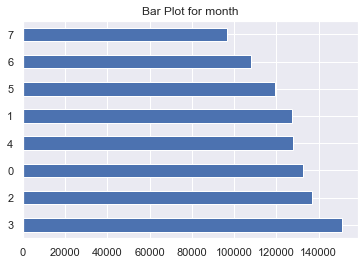

In [56]:
df["month"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for month")
plt.show()

## Numerical Data Analysis : Float

In [57]:
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
float_columns

['income',
 'name_email_similarity',
 'current_address_months_count',
 'days_since_request',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes',
 'device_distinct_emails_8w']

### Income

In [58]:
df["income"].value_counts(dropna=False)

0.9    221419
0.1    157449
0.8    146650
0.6    111973
0.7    105109
0.4     81364
0.2     69345
0.5     55858
0.3     50833
Name: income, dtype: int64

In [59]:
df["income"].value_counts(1, dropna=False)*100 

0.9    22.1419
0.1    15.7449
0.8    14.6650
0.6    11.1973
0.7    10.5109
0.4     8.1364
0.2     6.9345
0.5     5.5858
0.3     5.0833
Name: income, dtype: float64

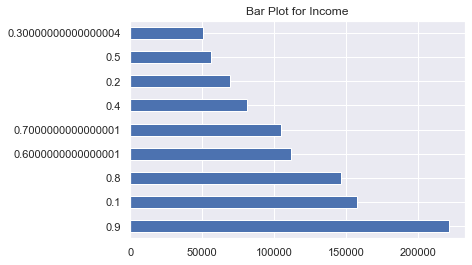

In [60]:
df["income"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for Income")
plt.show()

### device_distinct_emails_8w

In [61]:
df["device_distinct_emails_8w"].value_counts(dropna=False)

1.0    968426
2.0     25302
0.0      6272
Name: device_distinct_emails_8w, dtype: int64

In [62]:
df["device_distinct_emails_8w"].value_counts(1, dropna=False)*100 

1.0    96.8426
2.0     2.5302
0.0     0.6272
Name: device_distinct_emails_8w, dtype: float64

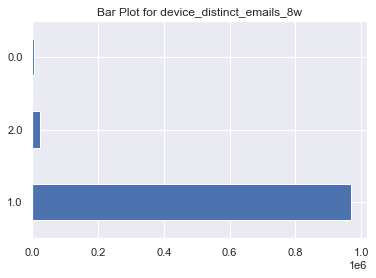

In [63]:
df["device_distinct_emails_8w"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for device_distinct_emails_8w")
plt.show()

## Outliers Analysis

In [64]:
df[['name_email_similarity',
 'current_address_months_count',
 'days_since_request',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes']]

,name_email_similarity,current_address_months_count,days_since_request,velocity_6h,velocity_24h,velocity_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes
0,0.166828,88.0,0.020925,10650.765523,3134.319630,3863.647740,185,24.0,500.0,3.888115
1,0.296286,144.0,0.005418,534.047319,2670.918292,3124.298166,259,15.0,1500.0,31.798819
2,0.044985,132.0,3.108549,4048.534263,2893.621498,3159.590679,177,15.0,200.0,4.728705
3,0.159511,22.0,0.019079,3457.064063,4054.908412,3022.261812,110,31.0,200.0,2.047904
4,0.596414,218.0,0.004441,5020.341679,2728.237159,3087.670952,295,31.0,1500.0,3.775225
...,...,...,...,...,...,...,...,...,...,...
999995,0.192631,104.0,0.030592,7905.711839,8341.468557,4972.635997,75,25.0,200.0,8.511502
999996,0.322989,9.0,1.628119,5391.470463,4955.170808,5022.728108,154,15.0,200.0,8.967865
999997,0.879403,30.0,0.018563,8063.102636,5670.654316,4377.196321,64,11.0,200.0,8.195531
999998,0.762112,189.0,0.015352,8092.641762,3982.582204,4394.803296,163,28.0,500.0,4.336064


In [65]:
f_l=['name_email_similarity',
 'current_address_months_count',
 'days_since_request',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'credit_risk_score',
 'proposed_credit_limit',
 'session_length_in_minutes']

### Indetification of Outliers

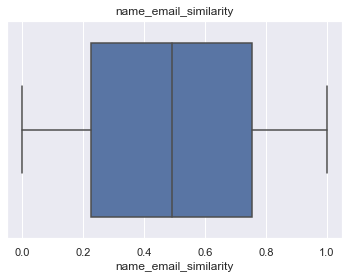

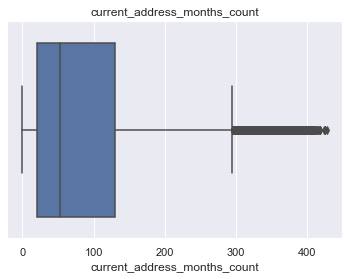

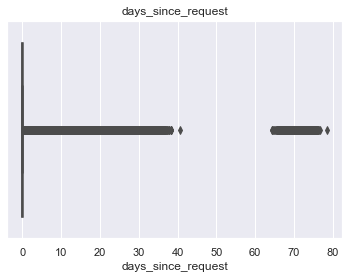

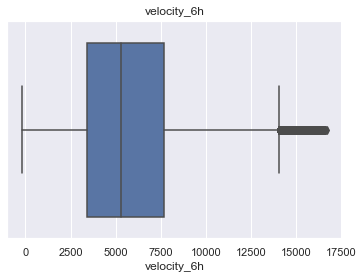

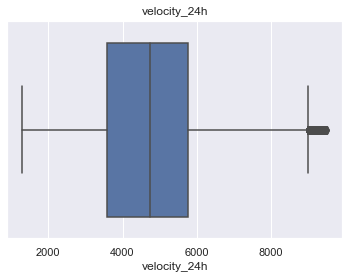

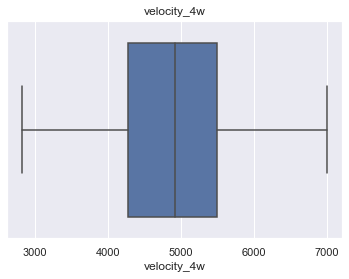

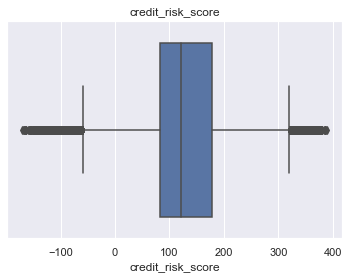

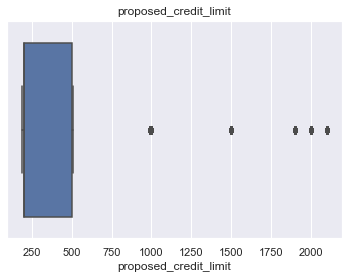

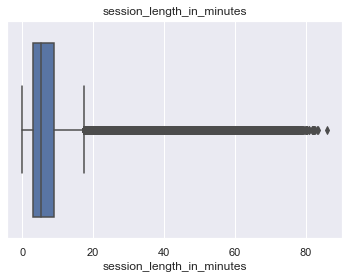

In [66]:
# Create a box plot for each float variable
for col in f_l:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [67]:
Columns_with_Outliers=['current_address_months_count',
 'days_since_request',
 'intended_balcon_amount',
 'velocity_6h',
 'velocity_24h',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes']

Columns_without_Outliers = ['name_email_similarity','velocity_4w','bank_months_count']

### Outlier Treatment

In [68]:
columns_to_impute_outliers=['current_address_months_count',
 'days_since_request',
 'velocity_6h',
 'velocity_24h',
 'credit_risk_score',
 'bank_months_count',
 'proposed_credit_limit',
 'session_length_in_minutes']

In [69]:
def impute_outliers_with_median(df, columns, threshold=3):
    for column in columns:
        # Calculate the median of the column
        median = df[column].median()
        
        # Calculate the absolute deviation from the median
        median_deviation = np.abs(df[column] - median)
        
        # Identify the outliers based on the specified threshold
        outliers = df[median_deviation > threshold * median_deviation.median()]
        
        # Impute the outlier values with the median
        df.loc[outliers.index, column] = median
    
    return df

# Example usage
# Assuming df is your pandas DataFrame and columns_to_impute_outliers is a list of column names

df = impute_outliers_with_median(df, columns_to_impute_outliers)


In [70]:
df

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,payment_type,zip_count_4w,velocity_6h,velocity_24h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,88.0,50,0.020925,AA,769,10650.765523,3134.319630,...,24.0,0,200.0,0,INTERNET,3.888115,windows,0,1.0,7
1,1,0.9,0.296286,144.0,50,0.005418,AB,366,534.047319,2670.918292,...,15.0,0,200.0,0,INTERNET,5.122832,windows,0,1.0,7
2,1,0.9,0.044985,132.0,40,0.015176,AC,870,4048.534263,2893.621498,...,15.0,0,200.0,0,INTERNET,4.728705,other,0,1.0,7
3,1,0.9,0.159511,22.0,50,0.019079,AB,810,3457.064063,4054.908412,...,31.0,1,200.0,0,INTERNET,2.047904,linux,0,1.0,7
4,1,0.9,0.596414,53.0,50,0.004441,AB,890,5020.341679,2728.237159,...,31.0,0,200.0,0,INTERNET,3.775225,macintosh,1,1.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,104.0,40,0.030592,AB,804,7905.711839,4749.921161,...,25.0,0,200.0,0,INTERNET,8.511502,linux,1,1.0,4
999996,0,0.8,0.322989,9.0,50,0.015176,AC,3306,5391.470463,4955.170808,...,15.0,0,200.0,0,INTERNET,8.967865,windows,0,1.0,4
999997,0,0.8,0.879403,30.0,20,0.018563,AA,1522,8063.102636,5670.654316,...,11.0,0,200.0,0,INTERNET,8.195531,other,0,1.0,4
999998,0,0.9,0.762112,53.0,20,0.015352,AA,1418,8092.641762,3982.582204,...,28.0,0,200.0,0,INTERNET,4.336064,windows,1,1.0,4


### After Removing Outliers using Z score

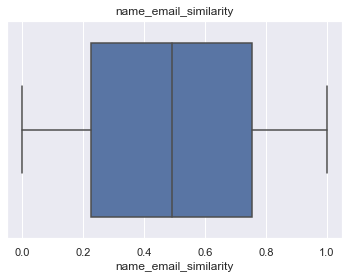

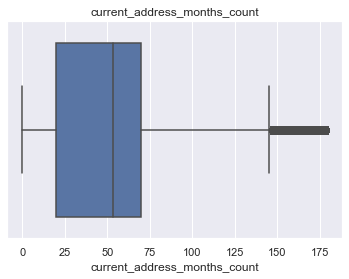

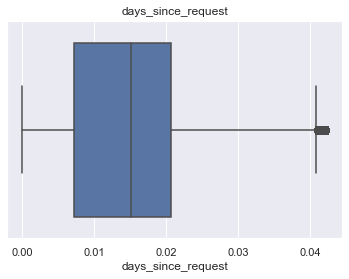

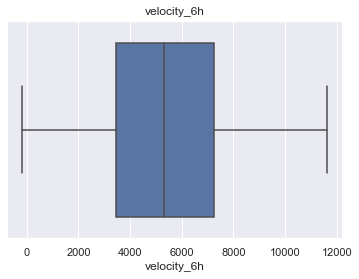

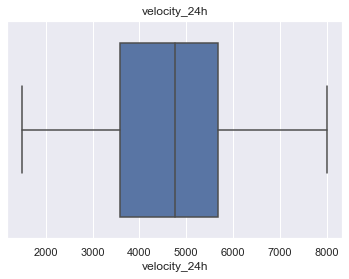

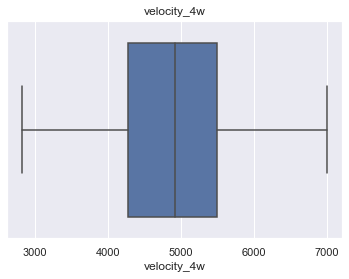

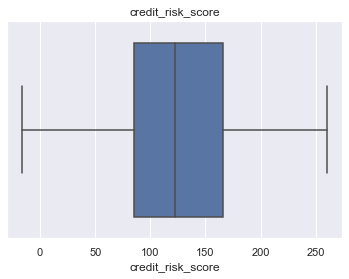

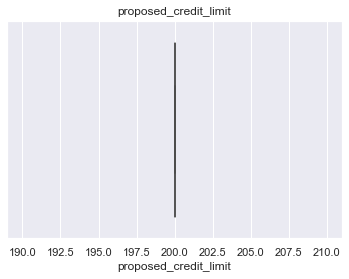

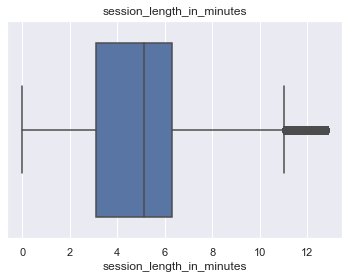

In [71]:
# Create a box plot for each float variable
for col in f_l:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

## Distribution Plots

In [72]:
'''
import seaborn as sns

# Iterate over each column with continuous numerical data
for column in float_columns:
    # Plot the distribution for the current column
    sns.histplot(df[column], kde=True)
    sns.kdeplot(df[column])
    
    # Add plot title and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    
    # Show the plot
    plt.show()
'''

'\nimport seaborn as sns\n\n# Iterate over each column with continuous numerical data\nfor column in float_columns:\n    # Plot the distribution for the current column\n    sns.histplot(df[column], kde=True)\n    sns.kdeplot(df[column])\n    \n    # Add plot title and labels\n    plt.title(f"Distribution of {column}")\n    plt.xlabel(column)\n    plt.ylabel("Density")\n    \n    # Show the plot\n    plt.show()\n'

## Categorical Data Analysis

In [73]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

### payment_type

In [74]:
df["payment_type"].value_counts(dropna=False)

AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: payment_type, dtype: int64

In [75]:
df["payment_type"].value_counts(1, dropna=False)*100 

AB    37.0554
AA    25.8249
AC    25.2071
AD    11.8837
AE     0.0289
Name: payment_type, dtype: float64

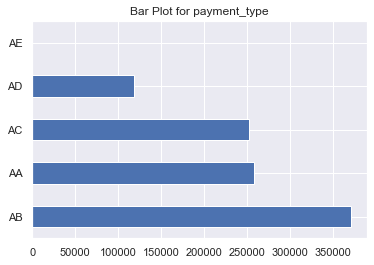

In [76]:
df["payment_type"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for payment_type")
plt.show()

### employment_status

In [77]:
df["employment_status"].value_counts(dropna=False)

CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: employment_status, dtype: int64

In [78]:
df["employment_status"].value_counts(1, dropna=False)*100

CA    73.0252
CB    13.8288
CF     4.4034
CC     3.7758
CD     2.6522
CE     2.2693
CG     0.0453
Name: employment_status, dtype: float64

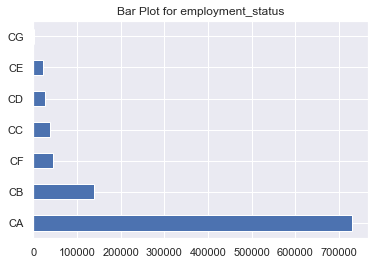

In [79]:
df["employment_status"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for employment_status")
plt.show()

### housing_status

In [80]:
df["housing_status"].value_counts(dropna=False)

BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: housing_status, dtype: int64

In [81]:
df["housing_status"].value_counts(1, dropna=False)*100 

BC    37.2143
BB    26.0965
BA    16.9675
BE    16.9135
BD     2.6161
BF     0.1669
BG     0.0252
Name: housing_status, dtype: float64

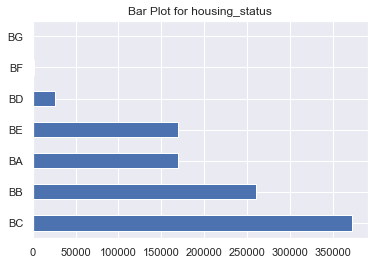

In [82]:
df["housing_status"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for housing_status")
plt.show()

### source

In [83]:
df["source"].value_counts(dropna=False)

INTERNET    992952
TELEAPP       7048
Name: source, dtype: int64

In [84]:
df["source"].value_counts(1, dropna=False)*100 

INTERNET    99.2952
TELEAPP      0.7048
Name: source, dtype: float64

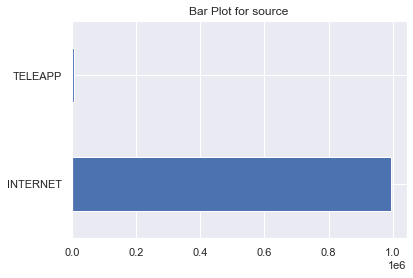

In [85]:
df["source"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for source")
plt.show()

### device_os

In [86]:
df["device_os"].value_counts(dropna=False)

other        342728
linux        332712
windows      263506
macintosh     53826
x11            7228
Name: device_os, dtype: int64

In [87]:
df["device_os"].value_counts(1, dropna=False)*100 

other        34.2728
linux        33.2712
windows      26.3506
macintosh     5.3826
x11           0.7228
Name: device_os, dtype: float64

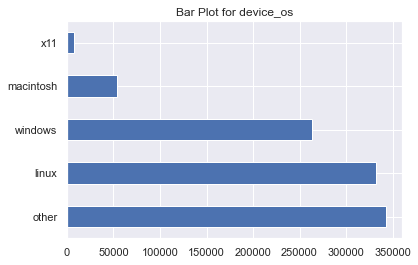

In [88]:
df["device_os"].value_counts(dropna=False).plot(kind="barh")
plt.title("Bar Plot for device_os")
plt.show()

# Bivariate Analysis

In [89]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Int columns:", int_columns)
print("\n")
print("Float columns:", float_columns)
print("\n")
print("Object columns:", object_columns)

Int columns: ['fraud_bool', 'customer_age', 'zip_count_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'month']


Float columns: ['income', 'name_email_similarity', 'current_address_months_count', 'days_since_request', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w']


Object columns: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [90]:
num_cols=['fraud_bool', 'customer_age', 'zip_count_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'has_other_cards', 'foreign_request', 'keep_alive_session', 'month','income', 'name_email_similarity', 'current_address_months_count', 'days_since_request', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w']

## Correlation Graph

<AxesSubplot:>

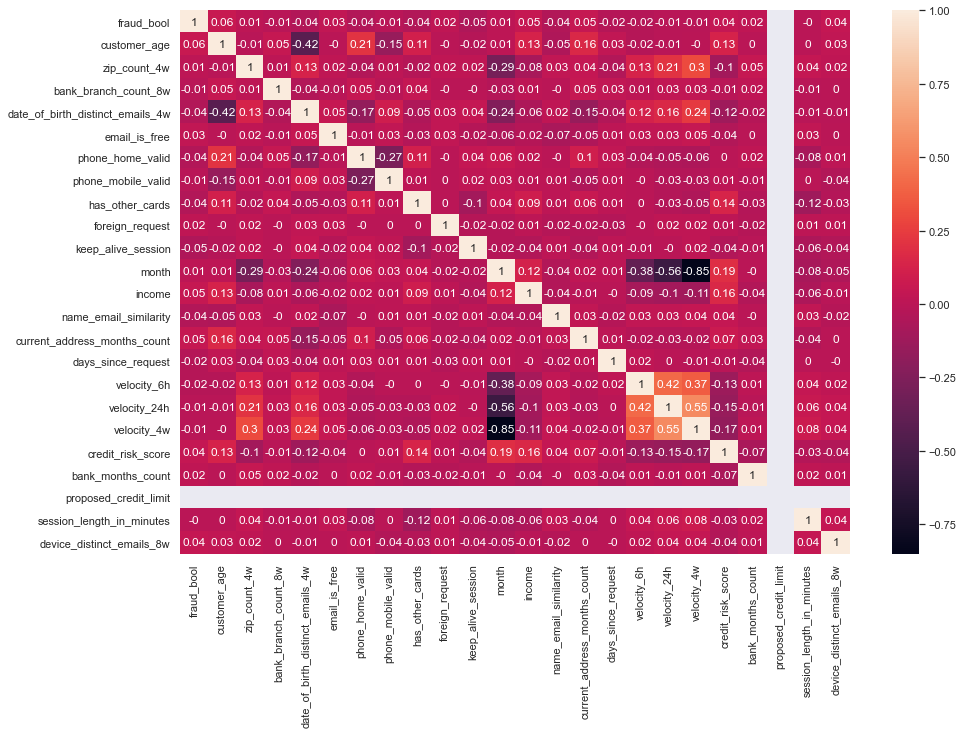

In [91]:
# Create a heatmap of the correlation matrix
corr =  df[num_cols].corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True)

## Stacked Bar Graphs

In [92]:
cat_cols=['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

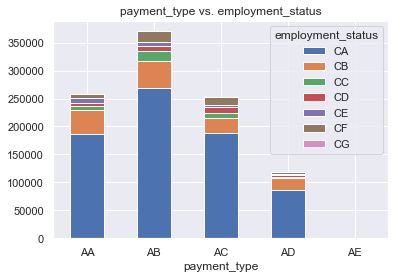

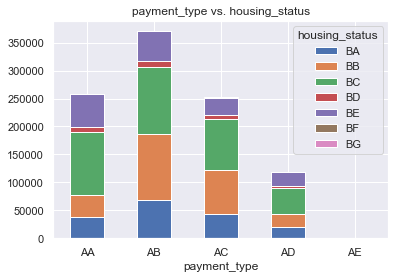

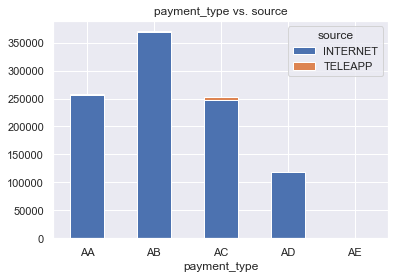

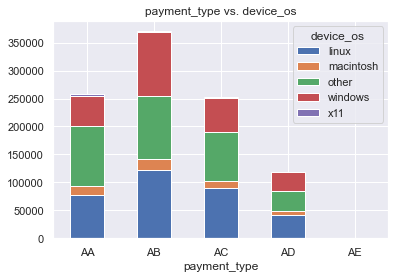

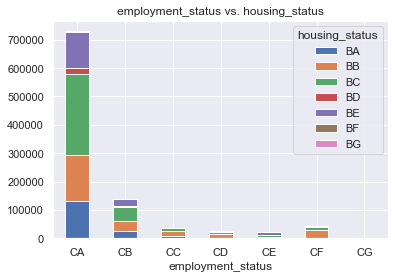

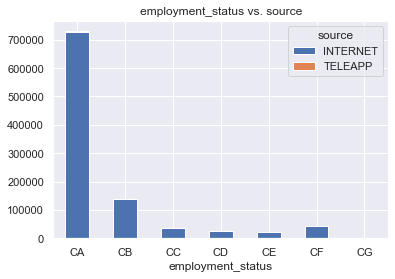

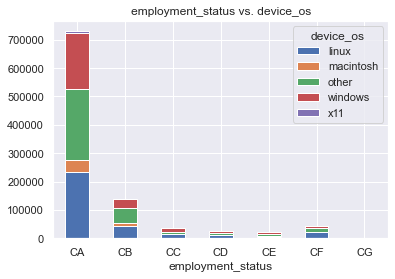

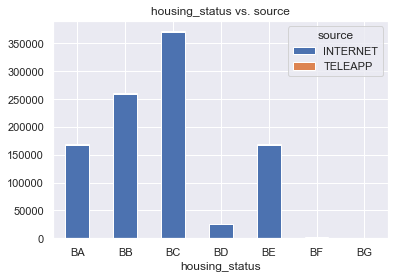

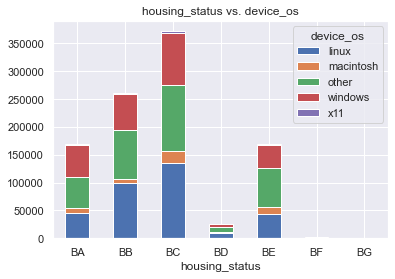

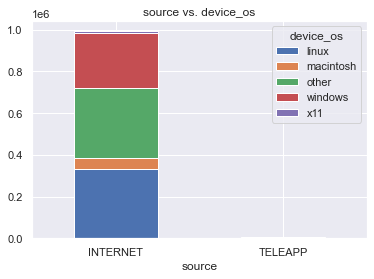

In [93]:
# Create a cross-tabulation of two categorical variables
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        ct = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        ct.plot(kind='bar', stacked=True)
        plt.title('{} vs. {}'.format(cat_cols[i], cat_cols[j]))
        plt.xticks(rotation=0)
        plt.show()

## Analysis with respect to Target

In [94]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'month'],
      dtype='object')

### income

In [95]:
pd.crosstab(df["income"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
income,,
0.1,99.422670,0.577330
0.2,99.368376,0.631624
0.3,99.335078,0.664922
0.4,99.266260,0.733740
0.5,99.205127,0.794873
0.6,99.122110,0.877890
0.7,99.118058,0.881942
0.8,98.907603,1.092397
0.9,97.836229,2.163771


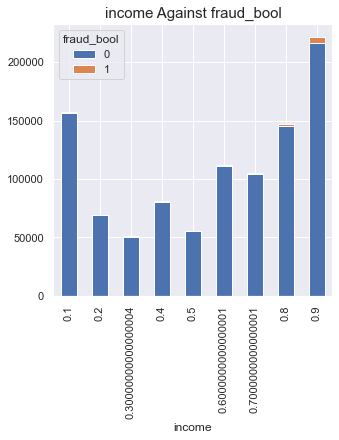

In [96]:
pd.crosstab(df["income"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("income Against fraud_bool", fontsize=15);
plt.show()

### customer_age

In [97]:
pd.crosstab(df["customer_age"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
customer_age,,
10,99.647401,0.352599
20,99.509874,0.490126
30,99.168682,0.831318
40,98.795201,1.204799
50,98.001468,1.998532
60,96.695427,3.304573
70,95.964401,4.035599
80,95.065536,4.934464
90,94.736842,5.263158


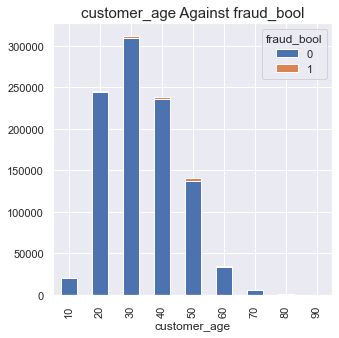

In [98]:
pd.crosstab(df["customer_age"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("customer_age Against fraud_bool", fontsize=15);
plt.show()

###  zip_count_4w

In [99]:
pd.crosstab(df["zip_count_4w"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
zip_count_4w,,
1,100.0,0.0
2,100.0,0.0
3,100.0,0.0
4,100.0,0.0
5,100.0,0.0
...,...,...
6563,100.0,0.0
6568,100.0,0.0
6634,100.0,0.0


### bank_branch_count_8w

In [100]:
pd.crosstab(df["bank_branch_count_8w"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
bank_branch_count_8w,,
0,98.223389,1.776611
1,98.392919,1.607081
2,98.738580,1.261420
3,99.408923,0.591077
4,99.427442,0.572558
...,...,...
2367,100.000000,0.000000
2371,100.000000,0.000000
2380,100.000000,0.000000


### date_of_birth_distinct_emails_4w

In [101]:
pd.crosstab(df["date_of_birth_distinct_emails_4w"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
date_of_birth_distinct_emails_4w,,
0,95.209581,4.790419
1,95.798845,4.201155
2,96.763446,3.236554
3,98.109752,1.890248
4,98.759373,1.240627
5,98.829193,1.170807
6,98.921061,1.078939
7,98.844855,1.155145
8,98.704256,1.295744


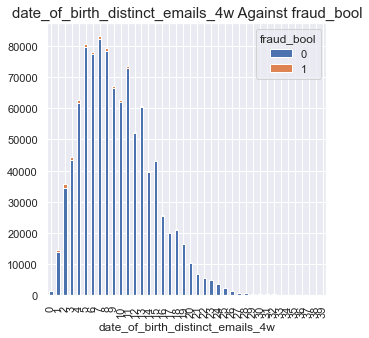

In [102]:
pd.crosstab(df["date_of_birth_distinct_emails_4w"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("date_of_birth_distinct_emails_4w Against fraud_bool", fontsize=15);
plt.show()

### email_is_free

In [103]:
pd.crosstab(df["email_is_free"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
email_is_free,,
0,99.204874,0.795126
1,98.624044,1.375956


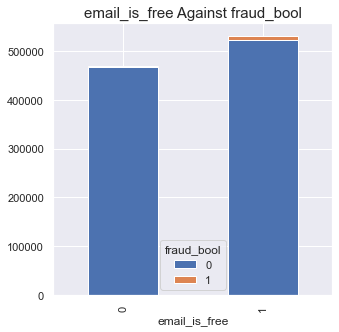

In [104]:
pd.crosstab(df["email_is_free"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("email_is_free Against fraud_bool", fontsize=15);
plt.show()

### phone_home_valid

In [105]:
pd.crosstab(df["phone_home_valid"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
phone_home_valid,,
0,98.586777,1.413223
1,99.330819,0.669181


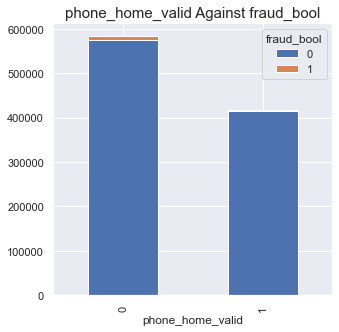

In [106]:
pd.crosstab(df["phone_home_valid"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("phone_home_valid Against fraud_bool", fontsize=15);
plt.show()

### has_other_cards

In [107]:
pd.crosstab(df["has_other_cards"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
has_other_cards,,
0,98.700406,1.299594
1,99.582489,0.417511


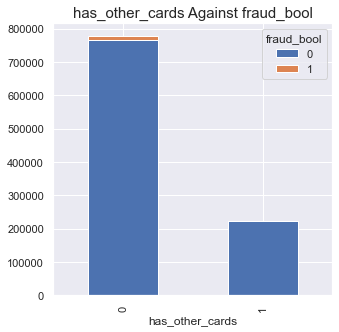

In [108]:
pd.crosstab(df["has_other_cards"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("has_other_cards Against fraud_bool", fontsize=15);
plt.show()

### foreign_request

In [109]:
pd.crosstab(df["foreign_request"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
foreign_request,,
0,98.925477,1.074523
1,97.801284,2.198716


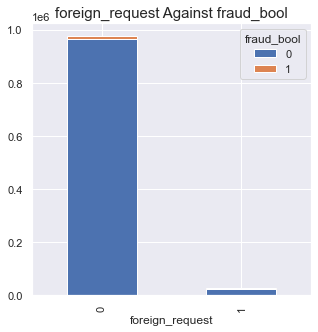

In [110]:
pd.crosstab(df["foreign_request"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("foreign_request Against fraud_bool", fontsize=15);
plt.show()

### keep_alive_session

In [111]:
pd.crosstab(df["keep_alive_session"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
keep_alive_session,,
0,98.283667,1.716333
1,99.346907,0.653093


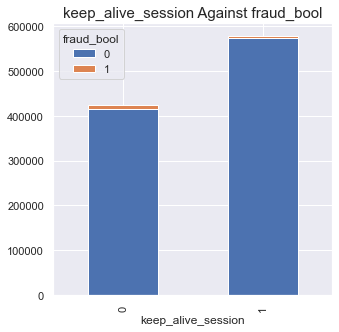

In [112]:
pd.crosstab(df["keep_alive_session"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("keep_alive_session Against fraud_bool", fontsize=15);
plt.show()

### month

In [113]:
pd.crosstab(df["month"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
month,,
0,98.867412,1.132588
1,99.061276,0.938724
2,99.125413,0.874587
3,99.077755,0.922245
4,98.862880,1.137120
5,98.817495,1.182505
6,98.659493,1.340507
7,98.525448,1.474552


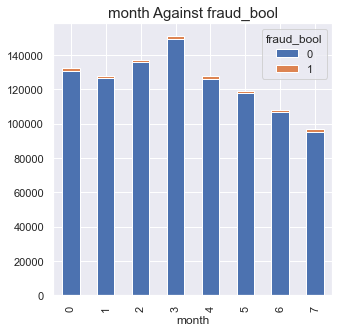

In [114]:
pd.crosstab(df["month"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("month Against fraud_bool", fontsize=15);
plt.show()

### device_distinct_emails_8w

In [115]:
pd.crosstab(df["device_distinct_emails_8w"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
device_distinct_emails_8w,,
0.0,97.592474,2.407526
1.0,98.983608,1.016392
2.0,95.909414,4.090586


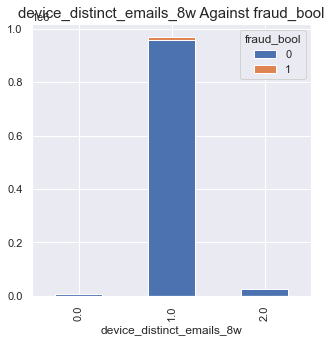

In [116]:
pd.crosstab(df["device_distinct_emails_8w"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("device_distinct_emails_8w Against fraud_bool", fontsize=15);
plt.show()

### payment_type

In [117]:
pd.crosstab(df["payment_type"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
payment_type,,
AA,99.471828,0.528172
AB,98.874928,1.125072
AC,98.330232,1.669768
AD,98.917845,1.082155
AE,99.653979,0.346021


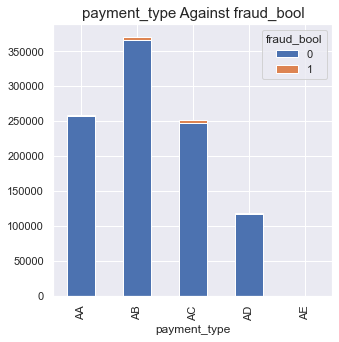

In [118]:
pd.crosstab(df["payment_type"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("payment_type Against fraud_bool", fontsize=15);
plt.show()

### employment_status

In [119]:
pd.crosstab(df["employment_status"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
employment_status,,
CA,98.781380,1.218620
CB,99.310858,0.689142
CC,97.531649,2.468351
CD,99.622955,0.377045
CE,99.766448,0.233552
CF,99.806967,0.193033
CG,98.454746,1.545254


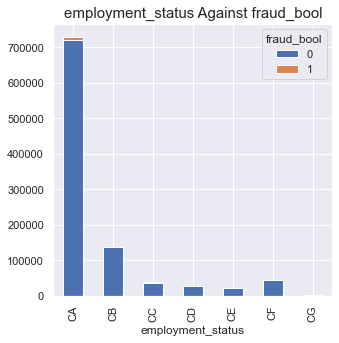

In [120]:
pd.crosstab(df["employment_status"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("employment_status Against fraud_bool", fontsize=15);
plt.show()

### housing_status

In [121]:
pd.crosstab(df["housing_status"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
housing_status,,
BA,96.253426,3.746574
BB,99.399153,0.600847
BC,99.385183,0.614817
BD,99.136119,0.863881
BE,99.655896,0.344104
BF,99.580587,0.419413
BG,99.603175,0.396825


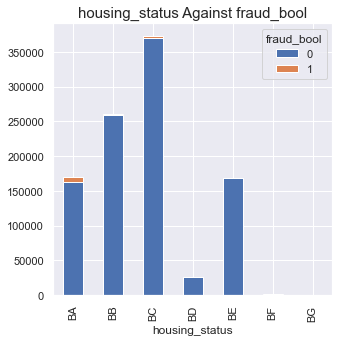

In [122]:
pd.crosstab(df["housing_status"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("housing_status Against fraud_bool", fontsize=15);
plt.show()

### source

In [123]:
pd.crosstab(df["source"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
source,,
INTERNET,98.900551,1.099449
TELEAPP,98.410897,1.589103


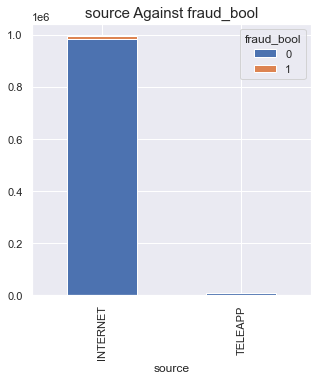

In [124]:
pd.crosstab(df["source"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("source Against fraud_bool", fontsize=15);
plt.show()

### device_os

In [125]:
pd.crosstab(df["device_os"], df["fraud_bool"], normalize="index")*100

fraud_bool,0,1
device_os,,
linux,99.484539,0.515461
macintosh,98.602906,1.397094
other,99.424033,0.575967
windows,97.530607,2.469393
x11,98.879358,1.120642


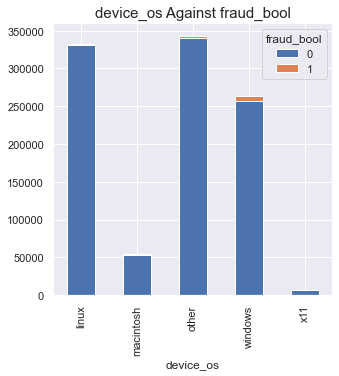

In [126]:
pd.crosstab(df["device_os"], df["fraud_bool"]).plot(kind="bar", figsize=(5, 5), stacked=True)
plt.title("device_os Against fraud_bool", fontsize=15);
plt.show()

# Feature Engineering

## one hot encoding

In [127]:
df.shape

(1000000, 29)

In [128]:
df = pd.get_dummies(df,drop_first=True) # one hot encoding

In [129]:
df.shape

(1000000, 45)

In [130]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w',
       'credit_risk_score', 'email_is_free', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes',
       'keep_alive_session', 'device_distinct_emails_8w', 'month',
       'payment_type_AB', 'payment_type_AC', 'payment_type_AD',
       'payment_type_AE', 'employment_status_CB', 'employment_status_CC',
       'employment_status_CD', 'employment_status_CE', 'employment_status_CF',
       'employment_status_CG', 'housing_status_BB', 'housing_status_BC',
       'housing_status_BD', 'housing_status_BE', 'housing_status_BF',
       'housing_status_BG', 'source_TELEAPP', 'device_os_macintosh',
       'device_os_oth

In [131]:
# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Model Building

## Train test Split

In [132]:
X = df.iloc[:, 1:]  
y = df.iloc[:, 0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Scaling 

In [133]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create an instance of the scaler
scaler = MinMaxScaler()  # or StandardScaler() for standardization
column_names = X_train.columns.tolist()
# Fit the scaler on the training data
scaler.fit(X_train)

# Apply scaling to both the training and testing data
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

X_train = pd.DataFrame(X_train, columns=column_names)
X_val = pd.DataFrame(X_val, columns=column_names)


In [134]:
value_counts = y_train.value_counts()
print(value_counts)

0    791195
1      8805
Name: fraud_bool, dtype: int64


In [135]:
value_counts = y_val.value_counts()
print(value_counts)

0    197776
1      2224
Name: fraud_bool, dtype: int64


In [137]:
X_train.columns

Index(['income', 'name_email_similarity', 'current_address_months_count',
       'customer_age', 'days_since_request', 'zip_count_4w', 'velocity_6h',
       'velocity_24h', 'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'payment_type_AB',
       'payment_type_AC', 'payment_type_AD', 'payment_type_AE',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BB', 'housing_status_BC', 'housing_status_BD',
       'housing_status_BE', 'housing_status_BF', 'housing_status_BG',
       'source_TELEAPP', 'device_os_macintosh', 'device_os_other',
       'device_o

## ML Models training without Sampling Techniques

In [138]:
from imblearn.ensemble import BalancedBaggingClassifier, EasyEnsembleClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Evaluating Logistic Regression...
Accuracy: 0.98887
Precision: 0.4583333333333333
Recall: 0.0049460431654676255
F1-Score: 0.009786476868327402

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197776
           1       0.46      0.00      0.01      2224

    accuracy                           0.99    200000
   macro avg       0.72      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000




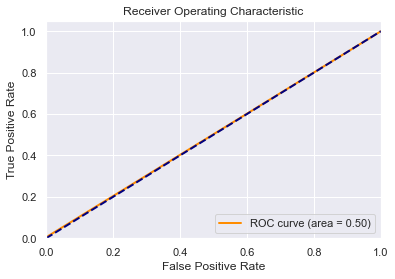

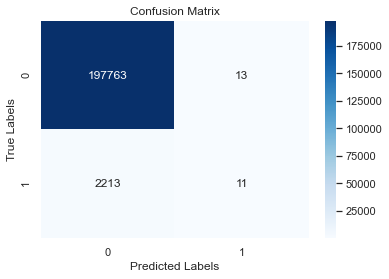

Evaluating Decision Tree...
Accuracy: 0.976595
Precision: 0.06574761399787911
Recall: 0.08363309352517985
F1-Score: 0.0736196319018405

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    197776
           1       0.07      0.08      0.07      2224

    accuracy                           0.98    200000
   macro avg       0.53      0.54      0.53    200000
weighted avg       0.98      0.98      0.98    200000




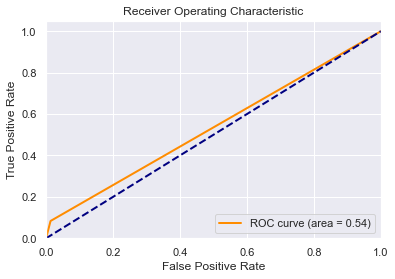

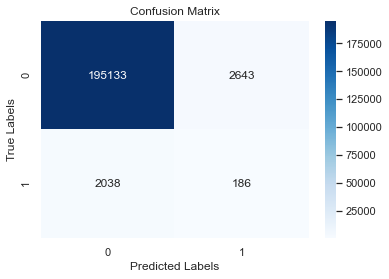

Evaluating Random Forest...
Accuracy: 0.98888
Precision: 0.0
Recall: 0.0
F1-Score: 0.0

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197776
           1       0.00      0.00      0.00      2224

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000




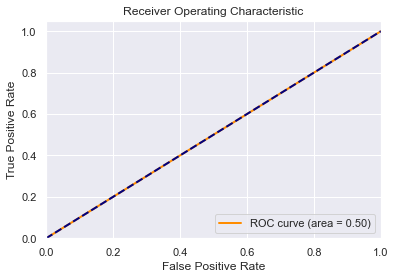

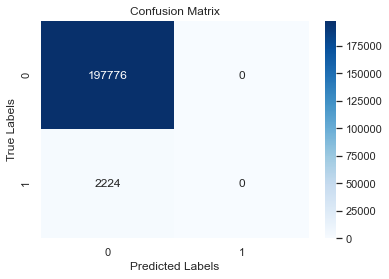

Evaluating GBM...
Accuracy: 0.98889
Precision: 0.5178571428571429
Recall: 0.013039568345323741
F1-Score: 0.025438596491228073

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197776
           1       0.52      0.01      0.03      2224

    accuracy                           0.99    200000
   macro avg       0.75      0.51      0.51    200000
weighted avg       0.98      0.99      0.98    200000




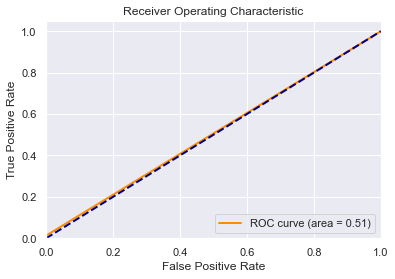

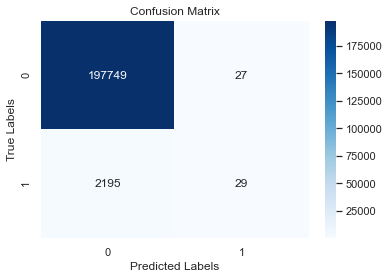

Evaluating LightGBM...
Accuracy: 0.9887
Precision: 0.4010989010989011
Recall: 0.03282374100719424
F1-Score: 0.06068162926018287

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197776
           1       0.40      0.03      0.06      2224

    accuracy                           0.99    200000
   macro avg       0.70      0.52      0.53    200000
weighted avg       0.98      0.99      0.98    200000




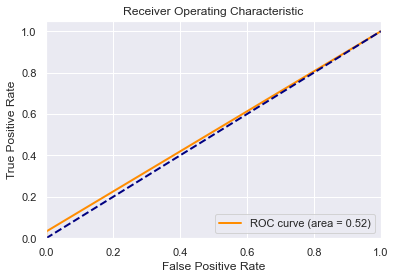

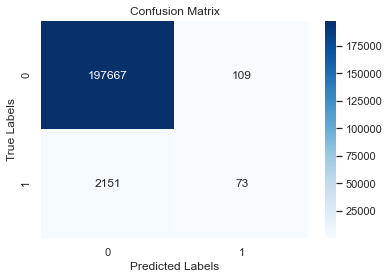

In [139]:
# Define a list of classification models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier(n_estimators=10, max_depth=10)),
    ('GBM', GradientBoostingClassifier()),
    ('LightGBM', LGBMClassifier())
]

# Iterate over each model
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate validation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Print the validation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print()
    
    # Print the classification report
    report = classification_report(y_val, y_pred)
    print("Classification Report:")
    print(report)
    print()
    
    # Draw ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


## ML Models to handle Imbalance in the dataset

Evaluating Balanced Bagging...
Accuracy: 0.874175
Precision: 0.05292902521728963
Recall: 0.6106115107913669
F1-Score: 0.09741400954054732

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    197776
           1       0.05      0.61      0.10      2224

    accuracy                           0.87    200000
   macro avg       0.52      0.74      0.51    200000
weighted avg       0.98      0.87      0.92    200000




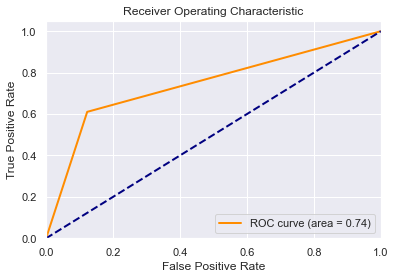

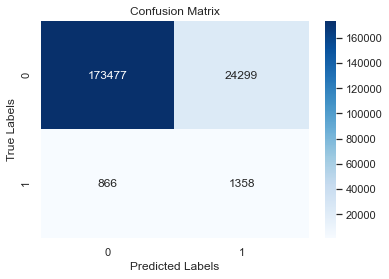

Evaluating Easy Ensemble...
Accuracy: 0.81212
Precision: 0.04565083281924738
Recall: 0.7985611510791367
F1-Score: 0.08636452052129935

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    197776
           1       0.05      0.80      0.09      2224

    accuracy                           0.81    200000
   macro avg       0.52      0.81      0.49    200000
weighted avg       0.99      0.81      0.89    200000




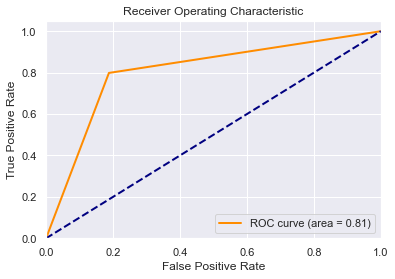

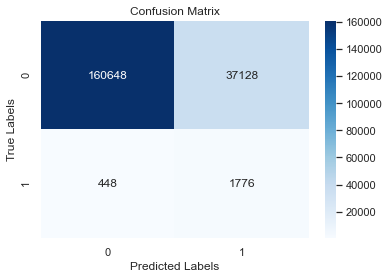

In [140]:
# Define a list of classification models to evaluate
models = [
    ('Balanced Bagging', BalancedBaggingClassifier()),
    ('Easy Ensemble', EasyEnsembleClassifier())
]

# Iterate over each model
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate validation metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Print the validation metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print()
    
    # Print the classification report
    report = classification_report(y_val, y_pred)
    print("Classification Report:")
    print(report)
    print()
    
    # Draw ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


# Feature Importance

In [213]:
# Define a list of classification models to evaluate
models = [
    ('Logistic Regression', LogisticRegression()),
]

# Iterate over each model
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Print the classification report
    report = classification_report(y_val, y_pred)
    print("Classification Report:")
    print(report)
    print()
    # Get feature importance
    if hasattr(model, 'coef_'):
        feature_importance = model.coef_
        print("Top 10 Important Features:")
        indices = feature_importance.argsort()[0][-10:]  # Indices of top 10 features
        for idx in indices:
            feature_name = X_train.columns[idx]  # Assuming X_train is a DataFrame with feature names as column names
            importance = feature_importance[0][idx]
            print(f"Feature: {feature_name}, Importance: {importance}")
    print()

Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68    296970
           1       0.68      0.69      0.68    296413

    accuracy                           0.68    593383
   macro avg       0.68      0.68      0.68    593383
weighted avg       0.68      0.68      0.68    593383


Top 10 Important Features:
Feature: velocity_4w, Importance: -2.940435575576627e-06
Feature: velocity_24h, Importance: 2.4938853412070166e-06
Feature: zip_count_4w, Importance: 0.00010421389153766407
Feature: device_distinct_emails_8w, Importance: 0.0008145517356143347
Feature: device_os_windows, Importance: 0.0008798639393173059
Feature: income, Importance: 0.0014056302088048646
Feature: credit_risk_score, Importance: 0.005677437947210906
Feature: current_address_months_count, Importance: 0.00988896321377259
Feature: bank_months_count, Importance: 0.015182967151488088
Feature: customer_age, Importance: 0.04

In [214]:
from sklearn.tree import export_text
# Define a list of classification models to evaluate
models = [
    ('Decision Tree', DecisionTreeClassifier()),
]

# Iterate over each model
for name, model in models:
    print(f"Evaluating {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    # Print the classification report
    report = classification_report(y_val, y_pred)
    #print("Classification Report:")
    #print(report)
    print()
    
    # Print the decision tree structure
    print("Decision Tree:")
    tree_rules = export_text(model, feature_names=list(X_train.columns))
    #print(tree_rules)
    
    # Get feature importance
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        
        # Get indices of top ten features
        top_indices = feature_importance.argsort()[-10:][::-1]
        
        print("Top Ten Important Features:")
        for idx in top_indices:
            feature_name = X_train.columns[idx]  # Assuming X_train is a DataFrame with feature names as column names
            importance = feature_importance[idx]
            print(f"Feature: {feature_name}, Importance: {importance}")
    print()

Evaluating Decision Tree...

Decision Tree:
Top Ten Important Features:
Feature: keep_alive_session, Importance: 0.2299749149880952
Feature: housing_status_BE, Importance: 0.11104336264528152
Feature: has_other_cards, Importance: 0.10810396993908802
Feature: housing_status_BC, Importance: 0.09141564883076196
Feature: housing_status_BB, Importance: 0.09067230243439751
Feature: customer_age, Importance: 0.056892353390969916
Feature: current_address_months_count, Importance: 0.04054719110566784
Feature: phone_home_valid, Importance: 0.0401174912515881
Feature: device_os_other, Importance: 0.03274012021204674
Feature: income, Importance: 0.017662329623568226

